## Importing all the necessary libraries

In [79]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences




##Loading the dataset and getting the shape of the dataset

In [80]:

df = pd.read_csv("/content/train.csv", encoding=encoding)
print(df.shape)
df.head()

(27481, 10)


,textID,text,selected_text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²)
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,morning,0-20,Afghanistan,38928346,652860.0,60
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,noon,21-30,Albania,2877797,27400.0,105
2,088c60f138,my boss is bullying me...,bullying me,negative,night,31-45,Algeria,43851044,2381740.0,18
3,9642c003ef,what interview! leave me alone,leave me alone,negative,morning,46-60,Andorra,77265,470.0,164
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,noon,60-70,Angola,32866272,1246700.0,26


In [82]:
print(df.columns)

Index(['textID', 'text', 'selected_text', 'sentiment', 'Time of Tweet',
       'Age of User', 'Country', 'Population -2020', 'Land Area (Km²)',
       'Density (P/Km²)'],
      dtype='object')


## Only selecting the text and sentiment column

In [83]:
new_df=df[["text", "sentiment"]]
print(new_df.shape)

(27481, 2)


## Dropping the rows with neutral values

1.   List item
2.   List item



In [84]:
new_df = new_df.drop(new_df[new_df["sentiment"] == "neutral"].index)
print(new_df.shape)

(16363, 2)


## Plotting the countplot of sentiment

<Axes: xlabel='sentiment', ylabel='count'>

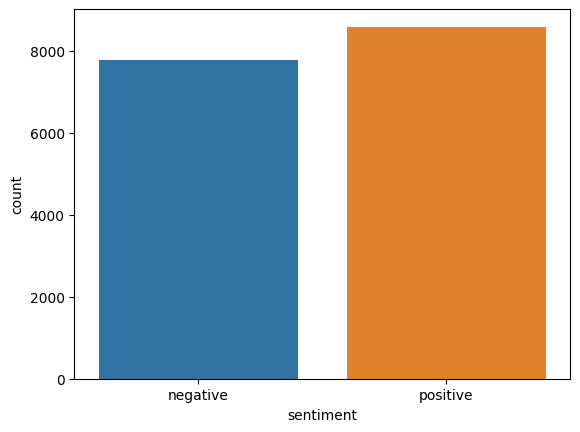

In [85]:
sns.countplot(x="sentiment", data=new_df, hue="sentiment")

In [86]:
new_df["sentiment"].value_counts()

sentiment
positive    8582
negative    7781
Name: count, dtype: int64

## Label encoding the values of sentiment into numeric values

In [87]:

le = LabelEncoder()
label = le.fit_transform(new_df['sentiment'])
print(label)

[0 0 0 ... 0 1 1]


In [88]:
texts=new_df.text.values

## Tokenisation and padding sequence the texts (preprocessing the texts)

In [90]:

tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(texts)
encoded_docs = tokenizer.texts_to_sequences(texts)

In [91]:

padded_sequence = pad_sequences(encoded_docs, maxlen=200)

## Model building (used LSTM model )

In [92]:
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index)+1, output_dim=50, input_length=200))
model.add(LSTM(units=64))
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
print(model.summary())


Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 200, 50)           944900    
                                                                 
 lstm_5 (LSTM)               (None, 64)                29440     
                                                                 
 dense_5 (Dense)             (None, 1)                 65        
                                                                 
Total params: 974405 (3.72 MB)
Trainable params: 974405 (3.72 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


## Training  the model

In [93]:
history=model.fit(padded_sequence, label, epochs=5, batch_size=32, validation_split=0.2)


Epoch 1/5
410/410 [==============================] - 63s 147ms/step - loss: 0.4317 - accuracy: 0.7925 - val_loss: 0.3128 - val_accuracy: 0.8769
Epoch 2/5
410/410 [==============================] - 58s 141ms/step - loss: 0.2390 - accuracy: 0.9065 - val_loss: 0.3086 - val_accuracy: 0.8796
Epoch 3/5
410/410 [==============================] - 57s 139ms/step - loss: 0.2344 - accuracy: 0.9095 - val_loss: 0.3286 - val_accuracy: 0.8729
Epoch 4/5
410/410 [==============================] - 57s 140ms/step - loss: 0.1621 - accuracy: 0.9403 - val_loss: 0.3374 - val_accuracy: 0.8732
Epoch 5/5
410/410 [==============================] - 59s 145ms/step - loss: 0.1296 - accuracy: 0.9563 - val_loss: 0.3575 - val_accuracy: 0.8662


## Plotting the validation and accuracy curves

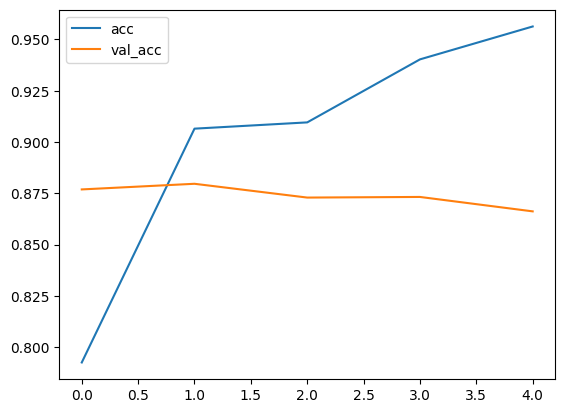

In [94]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()


In [95]:
loss, accuracy = model.evaluate(padded_sequence, label)
print(f'Loss: {loss}, Accuracy: {accuracy}')

512/512 [==============================] - 17s 34ms/step - loss: 0.1499 - accuracy: 0.9516
Loss: 0.14990298449993134, Accuracy: 0.9515981078147888


##  Predicting the values defined by user

In [106]:
def predict_sentiment(text):
    tw = tokenizer.texts_to_sequences([text])
    tw = pad_sequences(tw, maxlen=200)
    prediction = int(model.predict(tw).round().item())
    if prediction == 1:
        print("Predicted label: positive")
    else:
        print("Predicted label: negative")

# Test the function
test_sentence1 = "I enjoyed my journey on this flight."
predict_sentiment(test_sentence1)

test_sentence2 = "This is the worst flight experience of my life!"
predict_sentiment(test_sentence2)

sen="my boss is bullying me... "
predict_sentiment(sen)

1/1 [==============================] - 0s 51ms/step
Predicted label: positive
1/1 [==============================] - 0s 49ms/step
Predicted label: negative
1/1 [==============================] - 0s 51ms/step
Predicted label: negative


In [108]:
sen2="very sad"
predict_sentiment(sen2)
sen3="very beautiful"
predict_sentiment(sen3)

1/1 [==============================] - 0s 133ms/step
Predicted label: negative
1/1 [==============================] - 0s 96ms/step
Predicted label: positive


## Saving the model

In [109]:
import pickle


In [110]:
pickle.dump(model,open('/content/moel_saved','wb'))

In [111]:
model_loaded=pickle.load(open('/content/moel_saved','rb'))